In [31]:
import pandas as pd
import numpy as np

# Data processing

In [32]:
##step1 load the data and removing missing or irrelevant entires
laptop_original = pd.read_csv("laptop.csv")
laptop_original.head()

,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [33]:
####dropna
laptop_original.dropna(inplace=True)
####it seems the Name column is very complex and will not 
laptop_original = laptop_original.drop(['Name'],axis=1)
####then determine the type of each colum, label the string column and normalize the number column
laptop_original.dtypes

Unnamed: 0          int64
Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

In [34]:
###The Ghz column,  Adapter column can be transform to number
def process_Ghz(row):
    if row == "0":
        return 0
    return float(row.split(" ")[1])
laptop_original['Ghz'] = laptop_original['Ghz'].apply(process_Ghz)

def process_adapter(row):
    if row == "no":
        return 0
    return int(row)
laptop_original['Adapter'] = laptop_original['Adapter'].apply(process_adapter)

####and then, lets viisualize the type of each column and the unique value for each column
print(laptop_original.nunique())
print(laptop_original.dtypes)

Unnamed: 0         3546
Brand                31
Price              1682
Processor_Name      124
Processor_Brand      19
RAM_Expandable       10
RAM                  20
RAM_TYPE             19
Ghz                  31
Display_type          2
Display              34
GPU                 277
GPU_Brand            10
SSD                  18
HDD                   8
Adapter              68
Battery_Life        191
dtype: int64
Unnamed: 0           int64
Brand               object
Price                int64
Processor_Name      object
Processor_Brand     object
RAM_Expandable      object
RAM                 object
RAM_TYPE            object
Ghz                float64
Display_type        object
Display             object
GPU                 object
GPU_Brand           object
SSD                 object
HDD                 object
Adapter              int64
Battery_Life        object
dtype: object


In [35]:
####transform all the other non-numeric column to nmber types
str_columns = ['Brand', 'Processor_Name', 'Processor_Brand','RAM_Expandable',"RAM","RAM_TYPE",'Display_type','Display','GPU','GPU_Brand','SSD','HDD','Battery_Life']

encoding_map = {}

for col in str_columns:
    laptop_original[col], uniques = pd.factorize(laptop_original[col])
    encoding_map[col] = dict(enumerate(uniques))

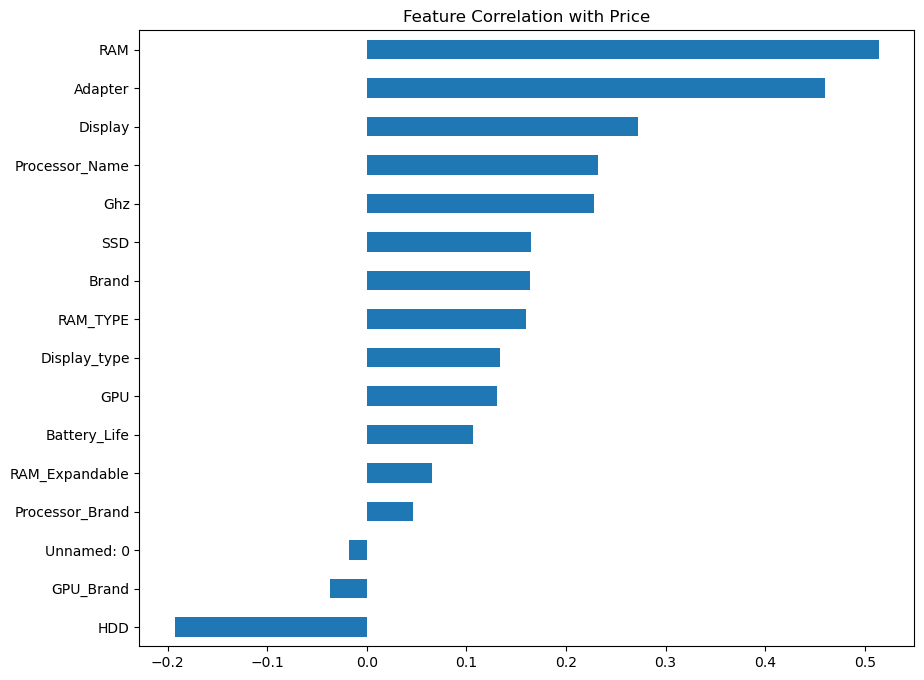

In [36]:
#as we can see, the processer name and GPU columns have too many types, lets visualize the relationship bettwen all the other features with price
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = laptop_original.corr()
price_correlation = correlation_matrix['Price'].drop('Price')

# Plot heatmap for correlation
plt.figure(figsize=(10, 8))
price_correlation.sort_values().plot(kind='barh')
plt.title('Feature Correlation with Price')
plt.savefig("Feautre_corr_price.png")
plt.show()

In [37]:
##from the above result, it seems the Processor_Brand and GPU Brand is not very correlate with the price, let's drop them
laptop_original = laptop_original.drop(['Processor_Brand','GPU_Brand'],axis=1)
laptop_original.head()

,Unnamed: 0,Brand,Price,Processor_Name,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,SSD,HDD,Adapter,Battery_Life
0,0,0,22990,0,0,0,0,2.0,0,0,0,0,0,45,0
1,1,1,36289,1,1,1,1,4.0,1,1,1,1,0,65,1
2,3,2,78500,2,2,2,2,3.3,1,1,2,1,0,56,2
3,4,0,55490,2,3,1,1,4.2,1,1,3,1,0,0,3
4,6,3,21990,3,0,3,3,1.7,1,1,4,1,0,45,4


In [38]:
###then do the min max normalization for Price, Ghz and Adapter
selected_columns = ['Price', 'Ghz','Adapter']

save_price_max = laptop_original['Price'].max()
save_price_min = laptop_original['Price'].min()

save_Ghz_max = laptop_original['Ghz'].max()
save_Ghz_min = laptop_original['Ghz'].min()

save_Adapter_max = laptop_original['Adapter'].max()
save_Adapter_min = laptop_original['Adapter'].min()

laptop_original[selected_columns] = laptop_original[selected_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
laptop_original.head()

,Unnamed: 0,Brand,Price,Processor_Name,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,SSD,HDD,Adapter,Battery_Life
0,0,0,0.030248,0,0,0,0,0.363636,0,0,0,0,0,0.136364,0
1,1,1,0.057066,1,1,1,1,0.727273,1,1,1,1,0,0.196970,1
2,3,2,0.142186,2,2,2,2,0.600000,1,1,2,1,0,0.169697,2
3,4,0,0.095785,2,3,1,1,0.763636,1,1,3,1,0,0.000000,3
4,6,3,0.028231,3,0,3,3,0.309091,1,1,4,1,0,0.136364,4


In [39]:
# calculate the statistic result for all nnumeric columns
laptop_original[['Price', 'Ghz','Adapter']].describe()

,Price,Ghz,Adapter
count,3546.000000,3546.000000,3546.000000
mean,0.128615,0.466144,0.219024
std,0.103749,0.228688,0.174760
min,0.000000,0.000000,0.000000
25%,0.063134,0.309091,0.136364
50%,0.101835,0.436364,0.196970
75%,0.155273,0.600000,0.196970
max,1.000000,1.000000,1.000000


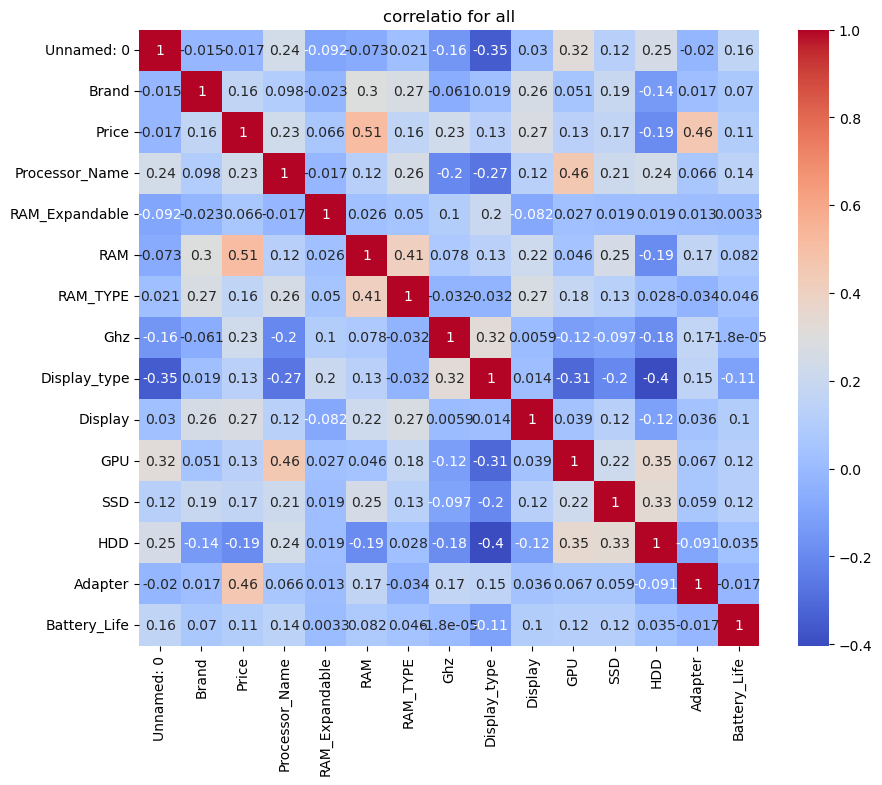

In [40]:
# calculate the correlatio betwee all features
correlation_matrix = laptop_original.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlatio for all')
plt.savefig("All_feautre_corr.png")
plt.show()

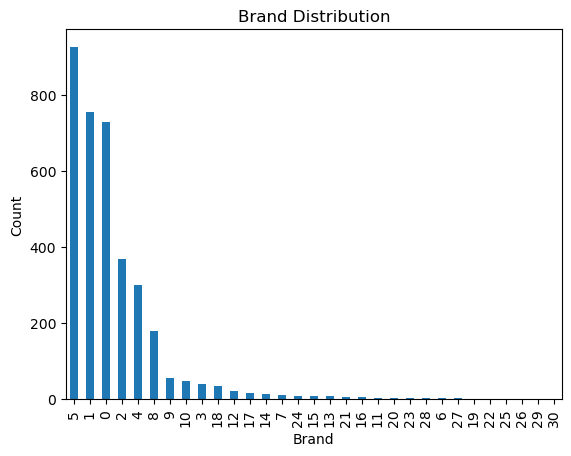

{0: 'HP',
 1: 'Lenovo',
 2: 'Dell',
 3: 'Infinix',
 4: 'Acer',
 5: 'ASUS',
 6: 'Tecno',
 7: 'Xiaomi',
 8: 'MSI',
 9: 'Samsung',
 10: 'Apple',
 11: 'Realme',
 12: 'AVITA',
 13: 'Zebronics',
 14: 'Honor',
 15: 'Fujitsu',
 16: 'Wings',
 17: 'LG',
 18: 'Microsoft',
 19: 'Razer',
 20: 'Coconics',
 21: 'Gigabyte',
 22: 'Huawei',
 23: 'Micromax',
 24: 'iball',
 25: 'Lava',
 26: 'VAIO',
 27: 'Smartron',
 28: 'Colorful',
 29: 'Nokia',
 30: 'RDP'}

In [41]:
##bar chart for brands
brand_counts = laptop_original['Brand'].value_counts()
brand_counts.plot(kind='bar', title='Brand Distribution')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()
encoding_map['Brand']

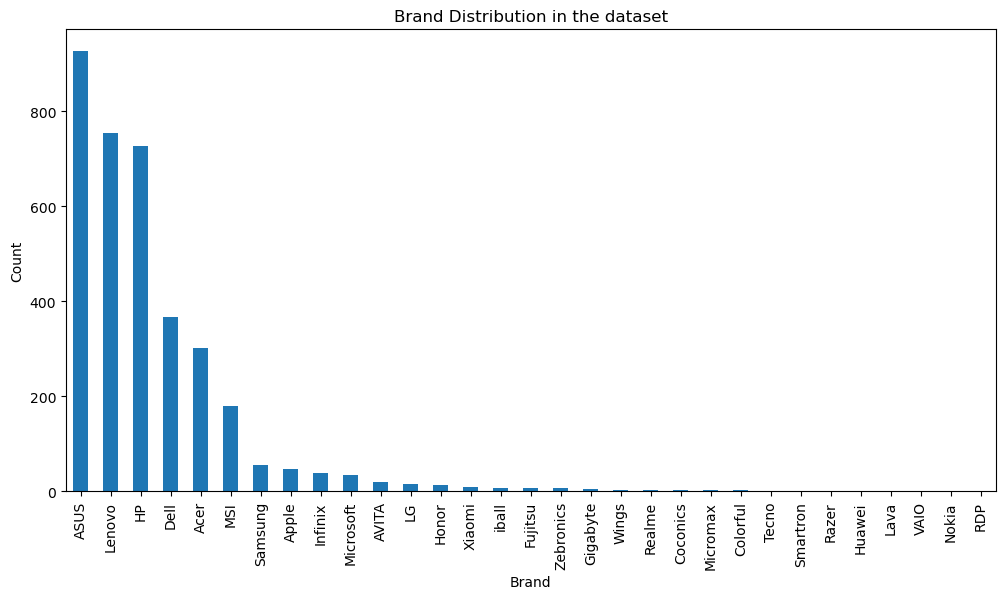

In [42]:
brand_counts = laptop_original['Brand'].value_counts()

brand_counts.index = brand_counts.index.map(encoding_map['Brand'])
plt.figure(figsize=(12,6))
brand_counts.plot(kind='bar', title='Brand Distribution in the dataset')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.savefig("brand_distribution.png")
plt.show()

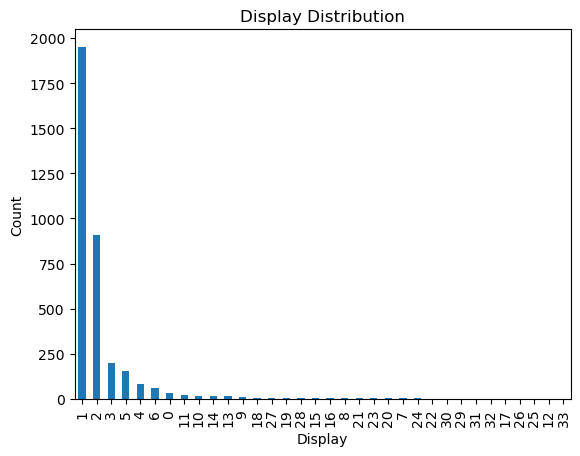

{0: '11.6 ',
 1: '15.6 ',
 2: '14 ',
 3: '16 ',
 4: '17.3 ',
 5: '13.3 ',
 6: '16.1 ',
 7: '13.6 ',
 8: '14.2 ',
 9: '14.1 ',
 10: '13.4 ',
 11: '15 ',
 12: '10.5 ',
 13: '13.5 ',
 14: '13 ',
 15: '12.4 ',
 16: '16.2 ',
 17: 'OLED Display With Touchscreen',
 18: '14.0 ',
 19: '17 ',
 20: '18 ',
 21: '14.5 ',
 22: '12 ',
 23: '10.1 ',
 24: '15. ',
 25: '14.9 ',
 26: '11 ',
 27: '12.3 ',
 28: '15.3 ',
 29: '16.6 ',
 30: '12.2 ',
 31: '12.5 ',
 32: '15.4 ',
 33: '12.0 '}

In [43]:
brand_counts = laptop_original['Display'].value_counts()
brand_counts.plot(kind='bar', title='Display Distribution')
plt.xlabel('Display')
plt.ylabel('Count')
plt.show()
encoding_map['Display']

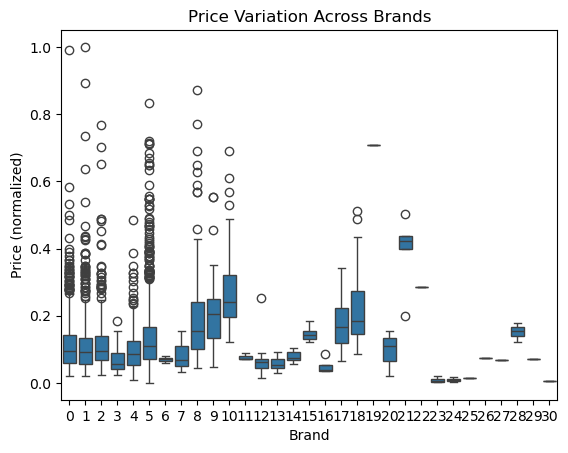

{0: 'HP',
 1: 'Lenovo',
 2: 'Dell',
 3: 'Infinix',
 4: 'Acer',
 5: 'ASUS',
 6: 'Tecno',
 7: 'Xiaomi',
 8: 'MSI',
 9: 'Samsung',
 10: 'Apple',
 11: 'Realme',
 12: 'AVITA',
 13: 'Zebronics',
 14: 'Honor',
 15: 'Fujitsu',
 16: 'Wings',
 17: 'LG',
 18: 'Microsoft',
 19: 'Razer',
 20: 'Coconics',
 21: 'Gigabyte',
 22: 'Huawei',
 23: 'Micromax',
 24: 'iball',
 25: 'Lava',
 26: 'VAIO',
 27: 'Smartron',
 28: 'Colorful',
 29: 'Nokia',
 30: 'RDP'}

In [44]:
#bos plot for price var vs brands
sns.boxplot(x='Brand', y='Price', data=laptop_original)
plt.title('Price Variation Across Brands')
plt.xlabel('Brand')
plt.ylabel('Price (normalized)')
plt.show()
encoding_map['Brand']

In [45]:
laptop_original

,Unnamed: 0,Brand,Price,Processor_Name,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,SSD,HDD,Adapter,Battery_Life
0,0,0,0.030248,0,0,0,0,0.363636,0,0,0,0,0,0.136364,0
1,1,1,0.057066,1,1,1,1,0.727273,1,1,1,1,0,0.196970,1
2,3,2,0.142186,2,2,2,2,0.600000,1,1,2,1,0,0.169697,2
3,4,0,0.095785,2,3,1,1,0.763636,1,1,3,1,0,0.000000,3
4,6,3,0.028231,3,0,3,3,0.309091,1,1,4,1,0,0.136364,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,4403,5,0.155273,31,2,1,1,0.290909,0,2,24,1,0,0.196970,6
3972,4404,5,0.064612,3,0,1,0,0.727273,0,1,4,4,0,0.196970,56
3973,4405,5,0.137124,7,0,2,0,0.563636,0,1,2,3,0,0.363636,56
3974,4407,5,0.128895,24,2,1,1,0.381818,0,1,9,1,0,0.454545,7


In [46]:
import plotly.express as px

del encoding_map['Processor_Brand']
del encoding_map['GPU_Brand']
decoded_table = laptop_original.copy()
for col in encoding_map:
    decoded_table[col] = decoded_table[col].map(encoding_map[col])

    
decoded_table = decoded_table[~decoded_table['Battery_Life'].str.contains("Adapter")]
   
decoded_table['Battery_Life_num'] = decoded_table['Battery_Life'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

# decoded_table = decoded_table.sort_values(by='Battery_Life_num')

    
    
# Interactive scatter plot for price vs performance
fig = px.scatter(decoded_table.sort_values(by='Battery_Life_num'), x='Price', y='Battery_Life_num', color='Brand', hover_data=['Processor_Name', 'RAM'])
fig.update_layout(title='Price vs Battery_Life')
fig.show()

# genreate the prediction for computer

In [47]:
#### first genreate the train and test data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y = laptop_original['Price']
X = laptop_original.drop(columns=['Price','Unnamed: 0'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
#build the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
X

,Brand,Processor_Name,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,SSD,HDD,Adapter,Battery_Life
0,0,0,0,0,0,0.363636,0,0,0,0,0,0.136364,0
1,1,1,1,1,1,0.727273,1,1,1,1,0,0.196970,1
2,2,2,2,2,2,0.600000,1,1,2,1,0,0.169697,2
3,0,2,3,1,1,0.763636,1,1,3,1,0,0.000000,3
4,3,3,0,3,3,0.309091,1,1,4,1,0,0.136364,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,5,31,2,1,1,0.290909,0,2,24,1,0,0.196970,6
3972,5,3,0,1,0,0.727273,0,1,4,4,0,0.196970,56
3973,5,7,0,2,0,0.563636,0,1,2,3,0,0.363636,56
3974,5,24,2,1,1,0.381818,0,1,9,1,0,0.454545,7


In [50]:
model.coef_, model.intercept_

(array([-2.97541980e-04,  8.02482021e-04,  2.99028515e-03,  1.81854033e-02,
        -2.46630084e-03,  6.98171491e-02,  5.12732040e-04,  5.09207593e-03,
         1.21191306e-04,  2.28357886e-03, -1.59148285e-02,  1.96906934e-01,
         7.28071929e-05]),
 -0.016757407997745888)

In [51]:
### measure the prediction
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.005431145318761946
R-squared (R2): 0.5033521627377227


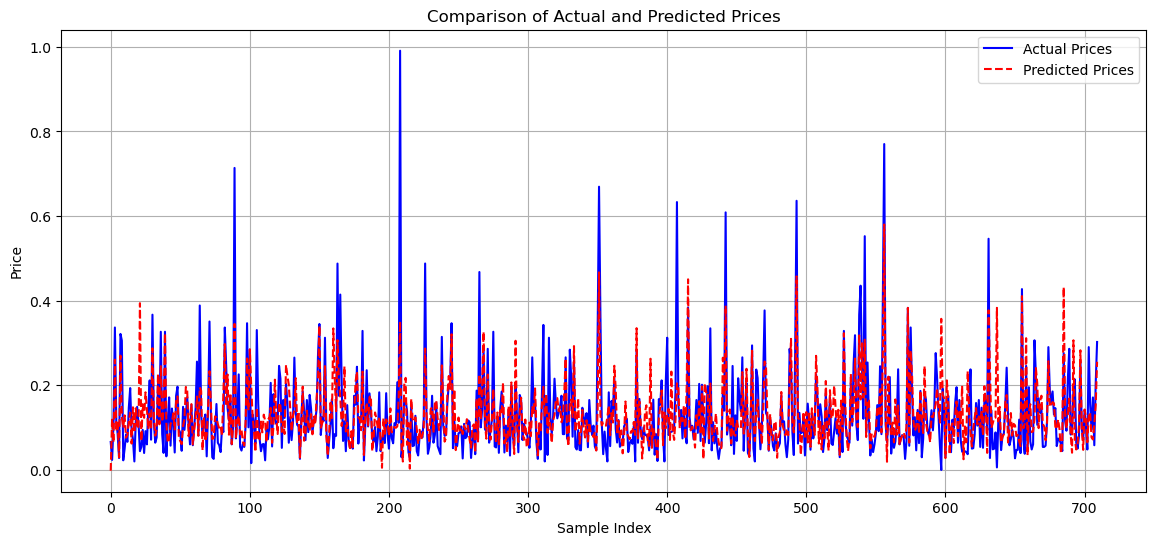

In [52]:
##plot our prediction with the real vale
plt.figure(figsize=(14, 6))

plt.plot(range(len(y_test)), y_test.values, label='Actual Prices', linestyle='-', color='b')
plt.plot(range(len(y_test)), y_pred, label='Predicted Prices', linestyle='--', color='r')

plt.title('Comparison of Actual and Predicted Prices')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [53]:
####save categorical and type
import json

#laptop_original = pd.read_csv("laptop.csv")
# str_columns = ['Brand', 'Processor_Name','RAM_Expandable',"RAM","RAM_TYPE","Ghz",'Display_type','Display','GPU','SSD','HDD','Adapter','Battery_Life']

unique_values = laptop_original['Ghz'].unique()
encoding_map['Ghz'] = {x: "{:.2f}".format(x * (save_Ghz_max - save_Ghz_min) + save_Ghz_min) for x in unique_values}

unique_values = laptop_original['Adapter'].unique()
encoding_map['Adapter'] = {x: "{:.2f}".format(x * (save_Adapter_max - save_Adapter_min) + save_Adapter_min) for x in unique_values}

# encoding_map['Adapter'] = {laptop_original['Adapter']:laptop_original['Adapter']*(save_Adapter_max - save_Adapter_min)+save_Adapter_min}
    
with open('category_data.json', 'w', encoding='utf-8') as f:
    json.dump(encoding_map, f, ensure_ascii=False, indent=4)

In [54]:
decoded_table

,Unnamed: 0,Brand,Price,Processor_Name,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,SSD,HDD,Adapter,Battery_Life,Battery_Life_num
0,0,HP,0.030248,MediaTek Octa-core,Not Expandable,4 GB,DDR4 RAM,0.363636,LED,11.6,Integrated Graphics,64 GB SSD Storage,No HDD,0.136364,Upto 12 Hrs Battery Life,12.0
1,1,Lenovo,0.057066,AMD Hexa-Core Ryzen 5,12 GB Expandable,8 GB,DDR4 RAM,0.727273,LCD,15.6,Radeon,512 GB SSD Storage,No HDD,0.196970,Upto 11 Hrs Battery Life,11.0
2,3,Dell,0.142186,Intel Core i5 (12th Gen),32 GB Expandable,16 GB,DDR5 RAM,0.600000,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",512 GB SSD Storage,No HDD,0.169697,Upto 10 Hrs Battery Life,10.0
3,4,HP,0.095785,Intel Core i5 (12th Gen),8 GB Expandable,8 GB,DDR4 RAM,0.763636,LCD,15.6,Iris Xe,512 GB SSD Storage,No HDD,0.000000,Upto 7.30 Hrs Battery Life,7.3
4,6,Infinix,0.028231,Intel Core i3 (11th Gen),Not Expandable,8 GB LP,LPDDR4X RAM,0.309091,LCD,15.6,UHD,512 GB SSD Storage,No HDD,0.136364,Upto 8 Hrs Battery Life,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3968,4400,Dell,0.056463,Intel Core i3 (11th Gen),Not Expandable,8 GB,DDR4 RAM,0.727273,LCD,15.6,UHD,512 GB SSD Storage,No HDD,0.196970,Upto 6 Hrs Battery Life,6.0
3969,4401,ASUS,0.205687,Intel Core i9 (13th Gen),Not Expandable,16 GB,DDR4 RAM,0.472727,LCD,16,"GeForce RTX 3050 GPU, 4 GB",1024 GB SSD Storage,No HDD,0.363636,Upto 6 Hrs Battery Life,6.0
3971,4403,ASUS,0.155273,Intel Core i5 (8th Gen),32 GB Expandable,8 GB,DDR4 RAM,0.290909,LED,14,"Geforce MX150 GPU, 2 GB",512 GB SSD Storage,No HDD,0.196970,Upto 9 Hrs Battery Life,9.0
3972,4404,ASUS,0.064612,Intel Core i3 (11th Gen),Not Expandable,8 GB,DDR4 RAM,0.727273,LED,15.6,UHD,256 GB SSD Storage,No HDD,0.196970,Upto 3 Hrs Battery Life,3.0


In [55]:
#trasform value to original value and save the result for website
decoded_table['Price'] = decoded_table['Price'].apply(lambda x: x*(save_price_max - save_price_min)+save_price_min)
decoded_table['Ghz'] = decoded_table['Ghz'].apply(lambda x: x*(save_Ghz_max - save_Ghz_min)+save_Ghz_min)
decoded_table = decoded_table.drop(['Price','Unnamed: 0'],axis=1)

In [56]:
save_price_max - save_price_min, save_price_min

(495900, 7990)

In [57]:
import altair as alt
import pandas as pd

# Load data from the CSV file
data = pd.read_csv('laptops.csv')

# Create an Altair chart
chart = alt.Chart(data).mark_circle(size=100).encode(
    x=alt.X('Price:Q', title='Price'),
    y=alt.Y('Battery_Life_num:Q', title='Battery Life'),
    color=alt.Color('Brand:N', legend=alt.Legend(title='Brand')),
    tooltip=[
        alt.Tooltip('Brand:N', title='Brand'),
        alt.Tooltip('Processor_Name:N', title='Processor'),
        alt.Tooltip('Price:Q', title='Price'),
        alt.Tooltip('Battery_Life:N', title='Battery Life'),
        alt.Tooltip('RAM:N', title='RAM'),
        alt.Tooltip('SSD:N', title='SSD'),
        alt.Tooltip('HDD:N', title='HDD'),
        alt.Tooltip('GPU:N', title='GPU')
    ]
).properties(
    title='Price vs Battery Life',
    width=600,
    height=400
)

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



alt.Chart(...)

In [58]:
chart.save('price_battery_chart.html')

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning:

the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.



In [59]:
# Load the original data for prices
laptop_original = pd.read_csv("laptop.csv")

def prepare_ram_price_data(df):
    """
    Prepare laptop data for RAM vs Price visualization
    """
    d3_data = []
    
    for _, row in df.iterrows():
        try:
            # Extract RAM value (remove 'GB' and convert to float)
            ram_str = str(row['RAM']).upper().replace('GB', '').strip()
            ram_value = float(ram_str)
            
            laptop_entry = {
                'brand': str(row['Brand']),
                'price': float(row['Price']),
                'ram': ram_value,
                'processor': str(row['Processor_Name'])
            }
            d3_data.append(laptop_entry)
            
        except Exception as e:
            print(f"Error processing row: {str(e)}")
            continue
    
    return d3_data

# Prepare the data
d3_data = prepare_ram_price_data(laptop_original)

print("\nData Statistics:")
print(f"Number of entries: {len(d3_data)}")
print(f"Price range: ${min(d['price'] for d in d3_data):.2f} - ${max(d['price'] for d in d3_data):.2f}")
print(f"RAM range: {min(d['ram'] for d in d3_data):.0f} - {max(d['ram'] for d in d3_data):.0f} GB")

# Save to JSON
with open('laptop_data_d3.json', 'w') as f:
    json.dump(d3_data, f)

Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '16  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '4  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '32  LP'
Error processing row: could not convert string to float: '16  LP'
Error processing row: could not convert string to float: '16  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: could not convert string to float: '8  LP'
Error processing row: